In [10]:
import yfinance as yf
import pandas as pd
import datetime as dt

Why The Buckle and CROX? Both midcap (2-10bn), both IPO more than 5 years ago. Both consumer cyclicals. Both 20%+ operating margins

In [33]:
tickers= ['CROX', 'BKE']

start_date= dt.datetime(2020,3,1)
end_date= dt.datetime(2021,7,1)

end_date-start_date



datetime.timedelta(days=487)

In [48]:
#stock_prices= yf.download(tickers, start='2020-03-01', end='2021-07-01')['Adj Close']
stock_prices= yf.download(tickers, start= start_date, end= end_date)['Adj Close']
stock_prices

[*********************100%***********************]  2 of 2 completed


,BKE,CROX
Date,,
2020-03-02,21.017149,26.540001
2020-03-03,20.689468,26.070000
2020-03-04,20.270763,26.870001
2020-03-05,19.424252,24.150000
2020-03-06,19.697319,24.230000
...,...,...
2021-06-24,45.410000,113.120003
2021-06-25,46.509998,114.410004
2021-06-28,45.869999,116.059998


In [49]:
stock_prices['BKE'].corr(stock_prices['CROX'])

0.9566274011802433

In [50]:
stock_prices.index = pd.to_datetime(stock_prices.index)
stock_rets= stock_prices.pct_change()

stock_rets1= stock_rets.dropna()
stock_rets1

,BKE,CROX
Date,,
2020-03-03,-0.015591,-0.017709
2020-03-04,-0.020238,0.030687
2020-03-05,-0.041760,-0.101228
2020-03-06,0.014058,0.003313
2020-03-09,-0.071627,-0.110194
...,...,...
2021-06-24,0.028306,0.016809
2021-06-25,0.024224,0.011404
2021-06-28,-0.013760,0.014422


In [58]:
stock_rets1['LS']= - stock_rets1['BKE'] + stock_rets1['CROX']
stock_rets1

<ipython-input-58-c1865ae6ad0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_rets1['LS']= - stock_rets1['BKE'] + stock_rets1['CROX']


,BKE,CROX,LS
Date,,,
2020-03-03,-0.015591,-0.017709,-0.002118
2020-03-04,-0.020238,0.030687,0.050924
2020-03-05,-0.041760,-0.101228,-0.059468
2020-03-06,0.014058,0.003313,-0.010745
2020-03-09,-0.071627,-0.110194,-0.038567
...,...,...,...
2021-06-24,0.028306,0.016809,-0.011497
2021-06-25,0.024224,0.011404,-0.012820
2021-06-28,-0.013760,0.014422,0.028182


Long CROX short BKE


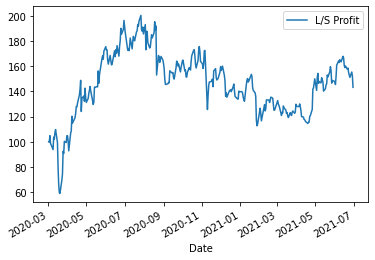

In [59]:
indexed_profits = [100]
x = 100
for i in stock_rets1['LS']:
    x = x*(1+i)
    indexed_profits.append(x)
indexed_frame = pd.DataFrame(indexed_profits)
indexed_frame['Date']= stock_rets.index
indexed_frame = indexed_frame.set_index('Date')
indexed_frame.columns = ['L/S Profit']

indexed_frame.plot()
print("Long CROX short BKE")

measure risk of strategy. what is maximum daily drawdown? WHat about prolonged drawdowns? Compare vs market, evaluate sharpes and correlations, when does the strategy work well?